In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
mnist = fetch_openml('mnist_784', version=1)


In [3]:
# mnist is a dictionary, with the following keys
print(mnist.keys())
# Use mnist['DESCR'] to read more information about the data
# Extract features and labels
X = np.c_[mnist['data']]
y = np.c_[mnist['target']].reshape(-1)
# investigate data
print(X.shape)  # 70000 images, with 784 pixels
print(y.shape)  # 70000 labels of which number the picture is of


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)
(70000,)


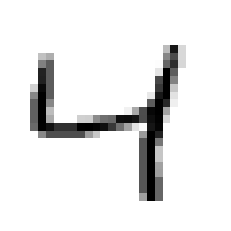

4
<class 'str'>
<class 'numpy.uint8'>


In [4]:
# extract single digit
import matplotlib.pyplot as plt
instance_index = 2
single_digit = X[instance_index, :]
single_digit_image = single_digit.reshape(28, 28)
# plot the digit
plt.imshow(single_digit_image, cmap='binary')
plt.axis('off')
plt.show()
# each instance is a and drawn digit between 0 and 1 (28X28 pixels equals 784 flatten pixels)
print(y[instance_index])
print(type(y[instance_index]))  # every label is a string
# change labels to number
y = y.astype(np.uint8)
print(type(y[instance_index]))  # every label is now numeric
# np.max(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=420)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
y_train__is5 = np.c_[[1 if i == 5 else 0 for i in y_train]].reshape(-1)
y_test__is5 = np.c_[[1 if i == 5 else 0 for i in y_test]].reshape(-1)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train__is5)
y_pred = model.predict(X_test)


In [23]:
def cm_pr_re(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = cm[0,0] / (cm[0,0] + cm[0,1])
    recall = cm[0,0] / (cm[0,0] + cm[1,0])
    return(cm, precision, recall)

cm_pr_re(y_test__is5, y_pred)

(array([[6333,   49],
        [ 109,  509]], dtype=int64),
 0.9923221560639298,
 0.9830797888854393)

In [10]:
test_0 = y_test__is5 * 0
cm_pr_re(y_test__is5, test_0)

[[6382    0]
 [ 618    0]] 1.0 0.9117142857142857


### Oppgave 7

In [15]:
y_proba = model.predict_proba(X_test)
def threshold(thresh):
    for x,i in enumerate(y_proba[:,1]):
        if i > thresh:
            y_proba[x,1] = 1
        else:
            y_proba[x,1] = 0
threshold(0.9)

In [16]:
cm_pr_re(y_test__is5, y_proba[:,1])

[[6377    5]
 [ 296  322]] 0.9992165465371357 0.9556421399670313


In [27]:
ls = [x * 0.01 for x in range(0, 100)]
for i in ls:
    y_proba = model.predict_proba(X_test)
    threshold(i)
    cm = cm_pr_re(y_test__is5, y_proba[:,1])[0]
    sum = 0
    sum += cm[1,0] * 100
    sum += cm[0,1] * 5
    print(i, sum)

C:\Users\magnu\AppData\Local\Temp\ipykernel_19824\1330540971.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = cm[0,0] / (cm[0,0] + cm[1,0])


0.0 31910
0.01 9430
0.02 7305
0.03 6380
0.04 5830
0.05 5435
0.06 5060
0.07 4965
0.08 4925
0.09 5060
0.1 4905
0.11 4935
0.12 4975
0.13 5145
0.14 5345
0.15 5275
0.16 5325
0.17 5555
0.18 5585
0.19 5830
0.2 5875
0.21 5820
0.22 6055
0.23 6015
0.24 6060
0.25 6430
0.26 6775
0.27 6925
0.28 7195
0.29 7380
0.3 7345
0.31 7910
0.32 8195
0.33 8370
0.34 8455
0.35000000000000003 8445
0.36 8525
0.37 8610
0.38 8900
0.39 8885
0.4 9165
0.41000000000000003 9255
0.42 9350
0.43 9645
0.44 9830
0.45 9915
0.46 10000
0.47000000000000003 10185
0.48 10670
0.49 10955
0.5 11145
0.51 11435
0.52 11615
0.53 11700
0.54 11790
0.55 11975
0.56 12050
0.5700000000000001 12250
0.58 12350
0.59 13045
0.6 13330
0.61 13820
0.62 14210
0.63 14410
0.64 14705
0.65 14995
0.66 15885
0.67 16385
0.68 16685
0.6900000000000001 17185
0.7000000000000001 17585
0.71 18075
0.72 18775
0.73 19170
0.74 19660
0.75 19960
0.76 20960
0.77 21160
0.78 21460
0.79 21860
0.8 22555
0.81 23155
0.8200000000000001 23955
0.8300000000000001 24550
0.84 25745
0.8